## Section 1.1 Load Project Data
Data files are in MatLab .mat file format.
Please store all data files in one folder and modify dataPath according to your own directory to retrive and compile data into one pandas data frame. 

In [27]:
import scipy.io
import pandas as pd
import os

def readOneMat(filePath):
    """Read multiple .mat files and compile as one data frame file.
    :param str filePath: The file path that contains multiple .mat files to load.
    :returns: 
    :rtype:
    """
    f = scipy.io.loadmat(filePath)
    columns = []
    for i in f:
        if '__' not in i :
            columns.append(i)
    data = pd.DataFrame(columns=columns)
    for i in data:
        if '__' not in i :
            data[i]=(f[i]).ravel() 
    return data

dataPath = "_"

# Use a for loop to composite all .mat files from dataPath. 
composite = pd.DataFrame()

for file in os.listdir(dataPath):
    #fileNames.append(file)
    
    #if file.endwith(".mat"):
    filePath = f"{dataPath}/{file}"
    composite = pd.concat([composite, readOneMat(filePath)])


In [ ]:
# composite.info() # for verification only

## Section 1.2 Data Cleaning and Preprocessing
* Data imputation for missing values
* Clean up invalid values

### Section 1.2.1 Transform Categorical Variable - Supervisor - "save_CALIPSO_phase"

In [28]:
# How many categories in supervisor “save_CALIPSO_phase	”？
print(composite["save_CALIPSO_phase"].unique())

[ 1. nan  2.  3.]


In [29]:
# nan is actually the forth category that represents phase = ground. 
composite["save_CALIPSO_phase"].fillna(0, inplace = True)
print(composite["save_CALIPSO_phase"].unique())

[1. 0. 2. 3.]


In [30]:
# Also as requested, update all 3's to 1's
#1 and 3 are ice and 2 is water, 0 is ground
composite["save_CALIPSO_phase"] = composite["save_CALIPSO_phase"].replace([3.0], 1.0)

## def subplot()

In [32]:
def subplot(feature1, feature2, featureName1, featureName2, supervisor):
    #import sys
    #if "matplotlib.pyplot" not in sys.modules:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()

    ax.scatter(feature1, feature2, c = supervisor, alpha=0.5)

    ax.set_xlabel(featureName1, fontsize=15)
    ax.set_ylabel(featureName2, fontsize=15)
    ax.set_title(featureName1 + ' and ' + featureName2 + ', colored by save_CALIPSO_phase')

    ax.grid(True)
    fig.tight_layout()

    plt.show()

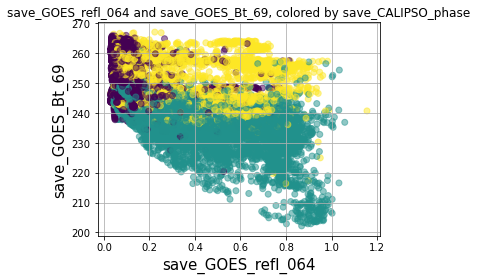

In [33]:
subplot(composite['save_GOES_refl_064'], composite['save_GOES_Bt_69'],'save_GOES_refl_064', 'save_GOES_Bt_69', composite["save_CALIPSO_phase"])

In [34]:
# Transform supervisor to a categorical variable
# from sklearn.preprocessing import OneHotEncoder
# categorical_encoder = OneHotEncoder()
# supervisor_cate = categorical_encoder.fit_transform(composite["save_CALIPSO_phase"].values.reshape(-1,1))

# Use ordinal_encoder instead as y_input in LineaarSVC needs to be an array.
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
supervisor_cate = ordinal_encoder.fit_transform(composite["save_CALIPSO_phase"].values.reshape(-1,1))

Verify whether transformed supervisor as expected.

In [35]:
#supervisor_cate[:100]
# supervisor_cate.toarray()
# type(supervisor_cate)
supervisor_cate.shape
#categorical_encoder.categories_
#pd.DataFrame(supervisor_cate)
# supervisor_cate

(12674, 1)

### Section 1.2.3 Define Features - Tier One and Tier Two
Tier One: 
* GOSE Bt and GOES refl are included

Tier Two:
* All

In [36]:
# Define X, the features
"""
:param pd.DataFrame features: Contain only GOES data.
:param pd.DataFrame featuresWithCalipso: Contain both Calipso and GOES data.
"""
tierOneCol = ['save_GOES_Bt_104','save_GOES_Bt_112', 
           'save_GOES_Bt_123', 'save_GOES_Bt_133',
           'save_GOES_Bt_39', 'save_GOES_Bt_62', 
           'save_GOES_Bt_69', 'save_GOES_Bt_73', 
           'save_GOES_Bt_85', 'save_GOES_Bt_96',
           'save_GOES_refl_047', 'save_GOES_refl_064',
           'save_GOES_refl_086','save_GOES_refl_137', 
           'save_GOES_refl_16', 'save_GOES_refl_23']
composite['time_diff'] = composite['save_CALIPSO_UTC'] - (composite['save_GOES_UTC_End'] + composite['save_GOES_UTC_Start'])/2
tierTwoCol = ['save_CALIPSO_GOES_Dist_Diff','save_GOES_Bt_104','save_GOES_Bt_112', 'save_GOES_Bt_123', 'save_GOES_Bt_133',
       'save_GOES_Bt_39', 'save_GOES_Bt_62', 'save_GOES_Bt_69',
       'save_GOES_Bt_73', 'save_GOES_Bt_85', 'save_GOES_Bt_96','save_GOES_lat',
       'save_GOES_lon', 'save_GOES_refl_047', 'save_GOES_refl_064',
       'save_GOES_refl_086', 'save_GOES_refl_137', 'save_GOES_refl_16',
       'save_GOES_refl_23', 'save_GOES_satAZ', 'save_GOES_satZ',
       'save_GOES_solAZ', 'save_GOES_solZ', 'time_diff']
# tierTwo = tierOne + time + space + geo distance
featuresOne = composite[tierOneCol]
featuresTwo = composite[tierTwoCol]
featuresOne.info(), featuresTwo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12674 entries, 0 to 178
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   save_GOES_Bt_104    12674 non-null  float64
 1   save_GOES_Bt_112    12674 non-null  float64
 2   save_GOES_Bt_123    12674 non-null  float64
 3   save_GOES_Bt_133    12674 non-null  float64
 4   save_GOES_Bt_39     12674 non-null  float64
 5   save_GOES_Bt_62     12674 non-null  float64
 6   save_GOES_Bt_69     12674 non-null  float64
 7   save_GOES_Bt_73     12674 non-null  float64
 8   save_GOES_Bt_85     12674 non-null  float64
 9   save_GOES_Bt_96     12674 non-null  float64
 10  save_GOES_refl_047  12674 non-null  float64
 11  save_GOES_refl_064  12674 non-null  float64
 12  save_GOES_refl_086  12674 non-null  float64
 13  save_GOES_refl_137  12674 non-null  float64
 14  save_GOES_refl_16   12674 non-null  float64
 15  save_GOES_refl_23   12674 non-null  float64
dtypes: flo

(None, None)

### Section 1.2.4 Split data - Training and Testing Set
ref: Page 53 73
* Split data into training and test data 
* Use cross-validation to run n-fold training, one fold is used as a validation set

In [38]:
supervisor_cate_arr = supervisor_cate.ravel()
supervisor_cate_arr.shape

(12674,)

In [39]:
from sklearn.model_selection import train_test_split
randomState = 111
folds = train_test_split(range(len(composite)), test_size = 0.2, random_state = randomState, stratify = supervisor_cate_arr) # index

In [40]:
X_train = featuresOne.iloc[folds[0],:]
y_train = supervisor_cate_arr[folds[0]]
X_test  = featuresOne.iloc[folds[1],:]
y_test  = supervisor_cate_arr[folds[1]]

X_train_Two = featuresTwo.iloc[folds[0],:]
X_test_Two  = featuresTwo.iloc[folds[1],:]

## Section 1.3 Model Training

### Section 1.3.1 Random Forest

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier

### Random Forest Training

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [43]:
rnd_clf.set_params

<bound method BaseEstimator.set_params of RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)>

In [44]:
from sklearn.model_selection import GridSearchCV
rnd_clf_raw = RandomForestClassifier(n_jobs = -1)
param_grid_rnd = [{
    "n_estimators": [100,300,500],
    "min_samples_split": [2, 50, 100],
    "min_samples_leaf": [1, 20],
    "max_features": ["sqrt", None],
    "max_leaf_nodes":[16, 50]
 }]
rnd_clf_grid = GridSearchCV(rnd_clf_raw, param_grid_rnd, cv=3)
rnd_clf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid=[{'max_features': ['sqrt', None],
                          'max_leaf_nodes': [16, 50],
                          'min_samples_leaf': [1, 20],
                          'min_samples_split': [2, 50, 100],
                          'n_estimators': [100, 300, 500]}])

In [45]:
rnd_clf_grid.best_estimator_, rnd_clf_grid.best_params_

(RandomForestClassifier(max_features='sqrt', max_leaf_nodes=50, n_jobs=-1),
 {'max_features': 'sqrt',
  'max_leaf_nodes': 50,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100})

#### Evaluation - Random Forest Training

In [46]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred_rnd = cross_val_predict(rnd_clf, X_train_scaled, y_train, cv=3)
conf_mx_rnd = confusion_matrix(y_train, y_train_pred_rnd)
conf_mx_rnd

array([[3651,  159,  216],
       [ 258, 3368,  132],
       [ 755,  285, 1315]], dtype=int64)

In [47]:
row_sums_rnd = conf_mx_rnd.sum(axis=1, keepdims=True)
norm_conf_mx_rnd = conf_mx_rnd / row_sums_rnd
norm_conf_mx_rnd

array([[0.90685544, 0.03949329, 0.05365127],
       [0.06865354, 0.89622139, 0.03512507],
       [0.32059448, 0.12101911, 0.55838641]])

#### Evaluation - Random Forest Training with GridSearchCV

In [48]:
y_train_pred_rnd_grid = cross_val_predict(rnd_clf_grid, X_train_scaled, y_train, cv=3)
conf_mx_rnd_grid = confusion_matrix(y_train, y_train_pred_rnd_grid)
conf_mx_rnd_grid

array([[3565,  159,  302],
       [ 192, 3422,  144],
       [ 634,  233, 1488]], dtype=int64)

In [49]:
row_sums_rnd_grid  = conf_mx_rnd_grid .sum(axis=1, keepdims=True)
norm_conf_mx_rnd_grid  = conf_mx_rnd_grid  / row_sums_rnd_grid 
norm_conf_mx_rnd_grid

array([[0.88549429, 0.03949329, 0.07501242],
       [0.05109101, 0.91059074, 0.03831825],
       [0.26921444, 0.09893843, 0.63184713]])

### Random Forest Testing

#### Evaluation - Random Forest Testing

In [50]:
# X_test_scaled = scaler.fit_transform(X_test)
y_test_pred_rnd = cross_val_predict(rnd_clf, X_test_scaled, y_test, cv=3)
conf_mx_rnd_pred = confusion_matrix(y_test, y_test_pred_rnd)
conf_mx_rnd_pred

array([[921,  47,  38],
       [ 66, 839,  35],
       [179,  82, 328]], dtype=int64)

In [51]:
row_sums_rnd_pred = conf_mx_rnd_pred.sum(axis=1, keepdims=True)
norm_conf_mx_rnd_pred = conf_mx_rnd_pred / row_sums_rnd_pred
norm_conf_mx_rnd_pred

array([[0.91550696, 0.04671968, 0.03777336],
       [0.07021277, 0.89255319, 0.03723404],
       [0.30390492, 0.13921902, 0.55687606]])

#### Evaluation - Random Forest Testing with GridSearchCV

In [52]:
# X_test_scaled = scaler.fit_transform(X_test)
y_test_pred_rnd_grid = cross_val_predict(rnd_clf_grid, X_test_scaled, y_test, cv=3)
conf_mx_rnd_pred_grid = confusion_matrix(y_test, y_test_pred_rnd_grid)
conf_mx_rnd_pred_grid

array([[909,  45,  52],
       [ 50, 852,  38],
       [164,  78, 347]], dtype=int64)

In [53]:
row_sums_rnd_pred_grid = conf_mx_rnd_pred.sum(axis=1, keepdims=True)
norm_conf_mx_rnd_pred_grid = conf_mx_rnd_pred_grid / row_sums_rnd_pred_grid
norm_conf_mx_rnd_pred_grid

array([[0.90357853, 0.04473161, 0.05168986],
       [0.05319149, 0.90638298, 0.04042553],
       [0.27843803, 0.13242784, 0.58913413]])

### Section 1.3.2 AdaBoost with DecisionTreeClassifier

In [54]:
# Adaboost Pg 203
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=200,
 algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train_scaled, y_train)
# DecisionTreeClassifier(max_depth= i)
# ada_clf.set_params

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [57]:
# from sklearn.model_selection import GridSearchCV
ada_clf_raw = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME.R")
param_grid_ada = [{
    "n_estimators": [100,300,500],
    "learning_rate":[0.2, 0.5, 1]
 }]
ada_clf_grid = GridSearchCV(ada_clf_raw, param_grid_ada, cv=3)
ada_clf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
             param_grid=[{'learning_rate': [0.2, 0.5, 1],
                          'n_estimators': [100, 300, 500]}])

In [58]:
ada_clf_grid.best_estimator_, ada_clf_grid.best_params_

(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                    learning_rate=0.5, n_estimators=300),
 {'learning_rate': 0.5, 'n_estimators': 300})

#### DecisionTreeClassifier(max_depth=2)

In [59]:
ada_clf_raw_ = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),algorithm="SAMME.R") # max_depth = 2
#param_grid_ada = [{
#    "n_estimators": [100,300,500],
#    "learning_rate":[0.2, 0.5, 1]
# }]
ada_clf_grid_ = GridSearchCV(ada_clf_raw_, param_grid_ada, cv=3)
ada_clf_grid_.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)),
             param_grid=[{'learning_rate': [0.2, 0.5, 1],
                          'n_estimators': [100, 300, 500]}])

In [60]:
ada_clf_grid_.best_estimator_, ada_clf_grid_.best_params_

(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                    learning_rate=0.2, n_estimators=300),
 {'learning_rate': 0.2, 'n_estimators': 300})

#### Evaluation - ADABOOST

In [61]:
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import confusion_matrix
y_train_pred_ada = cross_val_predict(ada_clf, X_train_scaled, y_train, cv=3)
conf_mx_ada = confusion_matrix(y_train, y_train_pred_ada)
conf_mx_ada

array([[3564,  172,  290],
       [ 232, 3333,  193],
       [ 681,  246, 1428]], dtype=int64)

In [62]:
row_sums_ada = conf_mx_ada.sum(axis=1, keepdims=True)
norm_conf_mx_ada = conf_mx_ada / row_sums_ada
norm_conf_mx_ada 

array([[0.8852459 , 0.04272231, 0.07203179],
       [0.06173497, 0.88690793, 0.0513571 ],
       [0.28917197, 0.1044586 , 0.60636943]])

#### Evaluation - ADABOOST with GridSearchCV

In [63]:
y_train_pred_ada_grid = cross_val_predict(ada_clf_grid, X_train_scaled, y_train, cv=3)
conf_mx_ada_grid = confusion_matrix(y_train, y_train_pred_ada_grid)
conf_mx_ada_grid

array([[3559,  181,  286],
       [ 202, 3383,  173],
       [ 677,  241, 1437]], dtype=int64)

In [64]:
row_sums_ada_grid = conf_mx_ada_grid.sum(axis=1, keepdims=True)
norm_conf_mx_ada_grid = conf_mx_ada_grid / row_sums_ada_grid
norm_conf_mx_ada_grid 

array([[0.88400397, 0.04495777, 0.07103825],
       [0.053752  , 0.90021288, 0.04603513],
       [0.28747346, 0.10233546, 0.61019108]])

#### Evaluation - ADABOOST with GridSearchCV and DecisionTreeClassifier(max_depth=2)

In [65]:
y_train_pred_ada_grid_ = cross_val_predict(ada_clf_grid_, X_train_scaled, y_train, cv=3)
conf_mx_ada_grid_ = confusion_matrix(y_train, y_train_pred_ada_grid_)
conf_mx_ada_grid_

array([[3581,  179,  266],
       [ 216, 3398,  144],
       [ 686,  251, 1418]], dtype=int64)

In [66]:
row_sums_ada_grid_ = conf_mx_ada_grid_.sum(axis=1, keepdims=True)
norm_conf_mx_ada_grid_ = conf_mx_ada_grid_ / row_sums_ada_grid_
norm_conf_mx_ada_grid_

array([[0.88946846, 0.044461  , 0.06607054],
       [0.05747738, 0.90420436, 0.03831825],
       [0.29129512, 0.10658174, 0.60212314]])

#### ADABOOST - Testing

#### Evaluation - ADABOOST - Testing

In [67]:
# X_test_scaled = scaler.fit_transform(X_test)
y_test_pred_ada = cross_val_predict(ada_clf, X_test_scaled, y_test, cv=3)
conf_mx_ada_pred = confusion_matrix(y_test, y_test_pred_ada)
conf_mx_ada_pred

array([[868,  48,  90],
       [ 64, 814,  62],
       [188,  63, 338]], dtype=int64)

In [68]:
row_sums_ada_pred = conf_mx_ada_pred.sum(axis=1, keepdims=True)
norm_conf_mx_ada_pred = conf_mx_ada_pred / row_sums_ada_pred
norm_conf_mx_ada_pred

array([[0.86282306, 0.04771372, 0.08946322],
       [0.06808511, 0.86595745, 0.06595745],
       [0.31918506, 0.10696095, 0.57385399]])

#### Evaluation - ADABOOST with GridSearchCV - Testing

In [69]:
# X_test_scaled = scaler.fit_transform(X_test)
y_test_pred_ada_grid = cross_val_predict(ada_clf_grid, X_test_scaled, y_test, cv=3)
conf_mx_ada_pred_grid = confusion_matrix(y_test, y_test_pred_ada_grid)
conf_mx_ada_pred_grid

array([[913,  41,  52],
       [ 65, 845,  30],
       [219,  85, 285]], dtype=int64)

In [70]:
row_sums_ada_pred_grid = conf_mx_ada_pred_grid.sum(axis=1, keepdims=True)
norm_conf_mx_ada_pred_grid = conf_mx_ada_pred_grid / row_sums_ada_pred_grid
norm_conf_mx_ada_pred_grid

array([[0.90755467, 0.04075547, 0.05168986],
       [0.06914894, 0.89893617, 0.03191489],
       [0.37181664, 0.14431239, 0.48387097]])

#### Evaluation - ADABOOST with GridSearchCV and DecisionTreeClassifier(max_depth=2) - Testing

In [71]:
# X_test_scaled = scaler.fit_transform(X_test)
y_test_pred_ada_grid_ = cross_val_predict(ada_clf_grid_, X_test_scaled, y_test, cv=3)
conf_mx_ada_pred_grid_ = confusion_matrix(y_test, y_test_pred_ada_grid_)
conf_mx_ada_pred_grid_

array([[843,  59, 104],
       [ 55, 819,  66],
       [164,  74, 351]], dtype=int64)

In [72]:
row_sums_ada_pred_grid_ = conf_mx_ada_pred_grid_.sum(axis=1, keepdims=True)
norm_conf_mx_ada_pred_grid_ = conf_mx_ada_pred_grid_ / row_sums_ada_pred_grid_
norm_conf_mx_ada_pred_grid_

array([[0.83797217, 0.05864811, 0.10337972],
       [0.05851064, 0.8712766 , 0.07021277],
       [0.27843803, 0.12563667, 0.5959253 ]])

### Section 1.3.3 Xgboost

### Xgboost - Training

In [79]:
import xgboost
xgb_clf = xgboost.XGBClassifier()
#grid = {'early_stopping_rounds':2}
#xgb_clf.set_params(**grid)
xgb_clf.fit(X_train_scaled, y_train,
 eval_set=[(X_test_scaled, y_test)])

[0]	validation_0-mlogloss:0.84752
[1]	validation_0-mlogloss:0.70287
[2]	validation_0-mlogloss:0.61097
[3]	validation_0-mlogloss:0.55174
[4]	validation_0-mlogloss:0.50857
[5]	validation_0-mlogloss:0.47727
[6]	validation_0-mlogloss:0.45736
[7]	validation_0-mlogloss:0.44169
[8]	validation_0-mlogloss:0.43022
[9]	validation_0-mlogloss:0.42249
[10]	validation_0-mlogloss:0.41580
[11]	validation_0-mlogloss:0.41187
[12]	validation_0-mlogloss:0.40857
[13]	validation_0-mlogloss:0.40652
[14]	validation_0-mlogloss:0.40264
[15]	validation_0-mlogloss:0.40101
[16]	validation_0-mlogloss:0.40072
[17]	validation_0-mlogloss:0.39878
[18]	validation_0-mlogloss:0.39776
[19]	validation_0-mlogloss:0.39605
[20]	validation_0-mlogloss:0.39497
[21]	validation_0-mlogloss:0.39449
[22]	validation_0-mlogloss:0.39362
[23]	validation_0-mlogloss:0.39264
[24]	validation_0-mlogloss:0.39175
[25]	validation_0-mlogloss:0.39113
[26]	validation_0-mlogloss:0.39037
[27]	validation_0-mlogloss:0.38887
[28]	validation_0-mlogloss:0.3

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

By "eval_set", XGBoost lets to pass data to the model to evaluate the performance of the model during training. Usually, a test (or validation) set would be used for this purpose.
Indeed you can use both test or validation set. here is the point, the data should be unseen by the model during training.
In fact, the data passed through eval_set won't be used for training. It will be used only to report model performance as the training goes.

### Section 1.3.3.2 Xgboost - Training with GridSearchCV

In [75]:
param_grid_xgb = { 
    'objective':['multi:softmax', 'multi:softprob'],
    'eta': [0.01, 0.3], # learning rate
    'max_depth':[3],
    'verbosity': [0],
    'n_estimators': [300],
    'num_leaves': [16, 32, 64], 
    'seed' : [111],
    'colsample_bytree' : [0.3, 0.8],
    'subsample' : [0.5,0.8],
    'reg_alpha' : [0.5,1.5],
    'reg_lambda' : [0.5,1.5]
    }
xgb_clf_raw = xgboost.XGBClassifier()
xgb_clf_grid = GridSearchCV(xgb_clf_raw, param_grid_xgb, cv=3)
xgb_clf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'colsample_b

In [76]:
xgb_clf_grid.best_estimator_, xgb_clf_grid.best_params_

(XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
               early_stopping_rounds=None, enable_categorical=False, eta=0.3,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=300,
               n_jobs=0, num_leaves=16, num_parallel_tree=1,
               objective='multi:softmax', predictor='auto', ...),
 {'colsample_bytree': 0.8,
  'eta': 0.3,
  'max_depth': 3,
  'n_estimators': 300,
  'num_leaves': 16,
  'objective': 'multi:softmax',
  'reg_alpha': 1.5,
  'reg_lambda': 1.5,
  'seed': 111,
  'subsample': 0.8,
  'verbosity': 0})

#### Xgboost - Evaluation - Training

In [80]:
y_train_pred_xgb = cross_val_predict(xgb_clf, X_train_scaled, y_train, cv=4)
conf_mx_xgb = confusion_matrix(y_train, y_train_pred_xgb)
conf_mx_xgb

array([[3466,  144,  416],
       [ 117, 3539,  102],
       [ 531,  188, 1636]], dtype=int64)

In [81]:
row_sums_xgb = conf_mx_xgb.sum(axis=1, keepdims=True)
norm_conf_mx_xgb = conf_mx_xgb / row_sums_xgb
norm_conf_mx_xgb

array([[0.86090412, 0.03576751, 0.10332837],
       [0.03113358, 0.94172432, 0.0271421 ],
       [0.22547771, 0.07983015, 0.69469214]])

#### Xgboost with GridSearchCV- Evaluation - Training

In [82]:
y_train_pred_xgb_grid = cross_val_predict(xgb_clf_grid, X_train_scaled, y_train, cv=4)
conf_mx_xgb_grid = confusion_matrix(y_train, y_train_pred_xgb_grid)
conf_mx_xgb_grid

array([[3450,  145,  431],
       [ 127, 3512,  119],
       [ 533,  203, 1619]], dtype=int64)

In [83]:
row_sums_xgb_grid = conf_mx_xgb_grid.sum(axis=1, keepdims=True)
norm_conf_mx_xgb_grid = conf_mx_xgb_grid / row_sums_xgb_grid
norm_conf_mx_xgb_grid

array([[0.85692996, 0.0360159 , 0.10705415],
       [0.03379457, 0.93453965, 0.03166578],
       [0.22632696, 0.08619958, 0.68747346]])

####  Xgboost - Evaluation - Testing

In [84]:
# X_test_scaled = scaler.fit_transform(X_test)
y_test_pred_xgb = cross_val_predict(xgb_clf, X_test_scaled, y_test, cv=3)
conf_mx_xgb_pred = confusion_matrix(y_test, y_test_pred_xgb)
conf_mx_xgb_pred

array([[877,  34,  95],
       [ 41, 864,  35],
       [146,  63, 380]], dtype=int64)

In [85]:
row_sums_xgb_pred = conf_mx_xgb_pred.sum(axis=1, keepdims=True)
norm_conf_mx_xgb_pred = conf_mx_xgb_pred / row_sums_xgb_pred
norm_conf_mx_xgb_pred

array([[0.87176938, 0.03379722, 0.0944334 ],
       [0.04361702, 0.91914894, 0.03723404],
       [0.24787776, 0.10696095, 0.64516129]])

####  Xgboost with GridSearchCV- Evaluation - Testing

In [86]:
# X_test_scaled = scaler.fit_transform(X_test)
y_test_pred_xgb_grid = cross_val_predict(xgb_clf_grid, X_test_scaled, y_test, cv=3)
conf_mx_xgb_pred_grid = confusion_matrix(y_test, y_test_pred_xgb_grid)
conf_mx_xgb_pred_grid

array([[865,  38, 103],
       [ 43, 866,  31],
       [142,  70, 377]], dtype=int64)

In [87]:
row_sums_xgb_pred_grid = conf_mx_xgb_pred_grid.sum(axis=1, keepdims=True)
norm_conf_mx_xgb_pred_grid = conf_mx_xgb_pred_grid / row_sums_xgb_pred_grid
norm_conf_mx_xgb_pred_grid

array([[0.85984095, 0.03777336, 0.10238569],
       [0.04574468, 0.9212766 , 0.03297872],
       [0.24108659, 0.1188455 , 0.64006791]])